# HW5_dcr346

# Assignment 1: Test the Z test:

(all simulated data)



Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).



fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).

### Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(14)
mymean = 500
mystd = 9
nsamples = 100

# picked poisson distribution
N = 1000
mydistmean = np.zeros(N)

for i in range(N):
    mydist = sp.stats.poisson.rvs(mymean, size=nsamples)
    mydistmean[i] = mydist.mean()

### plot your original distribution

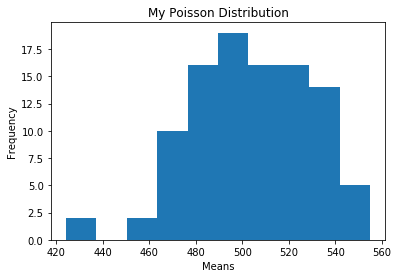

In [3]:
pl.hist(mydist)
pl.title('My Poisson Distribution')
pl.xlabel('Means')
pl.ylabel('Frequency')

### plot at least one of the samples

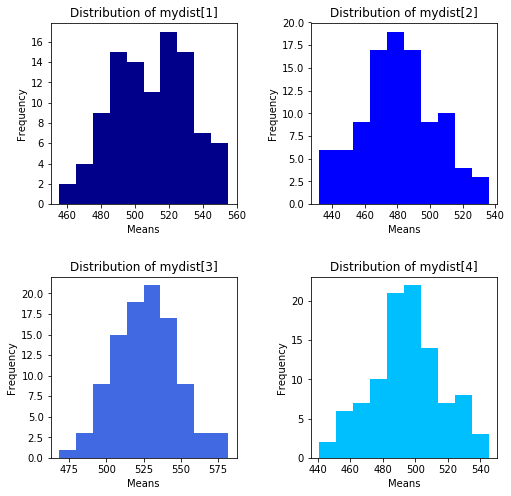

In [4]:
fig = pl.figure(figsize=(8,8))
fig.subplots_adjust(hspace=.4, wspace=.4)

color = ('darkblue','blue','royalblue','deepskyblue')

for M in range(1,5):
    pl.subplot(220+M)   # subfigure; M controls the location
    pl.hist(np.random.poisson(mydist[M], size=nsamples), color=color[M-1])
    pl.title('Distribution of mydist[%d]'%M)
    pl.xlabel('Means')
    pl.ylabel('Frequency')

### plot the distribution of z statistics

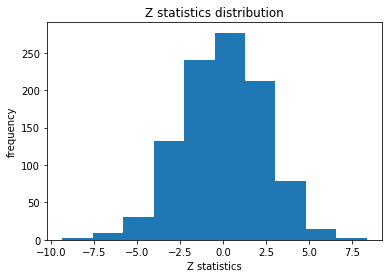

In [5]:
zs = (mymean - mydistmean) * np.sqrt(nsamples) / mystd
zs.sort()
pl.hist(zs)
pl.title('Z statistics distribution')
pl.xlabel('Z statistics')
pl.ylabel('frequency')

### fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).

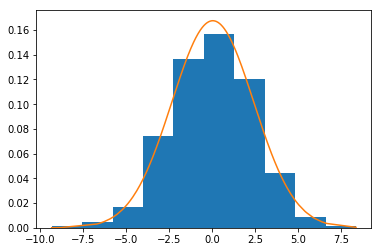

In [6]:
pl.hist(zs, normed=True)

# best fit line
# from StackoverFlow https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib
fit = stats.norm.pdf(zs, np.mean(zs), np.std(zs))
pl.plot(zs,fit)

pl.show()